In [3]:
# Load DataSet using pandas from_csv function 
from pandas import Series
data = Series.from_csv("DataSets\daily-total-female-births.csv", header=0)
print(type(data))
print(data.shape)
print(data['1959-01'])

<class 'pandas.core.series.Series'>
(365,)
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64


In [4]:
# load the DataSet using read_csv function
import pandas as pd
data = pd.read_csv("DataSets\daily-total-female-births.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
print(type(data))
print(data.shape)
print(data.describe())

<class 'pandas.core.series.Series'>
(365,)
count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


In [43]:
import pandas as pd

data = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
dataframe = pd.DataFrame()
dataframe['Month'] = [data.index[i].month for i in range(len(data))]
dataframe['day'] = [data.index[i].day for i in range(len(data))]
dataframe['temperature'] = [data[i] for i in range(len(data))]

In [44]:
dataframe.head(10)

,Month,day,temperature
0,1,1,20.7
1,1,2,17.9
2,1,3,18.8
3,1,4,14.6
4,1,5,15.8
5,1,6,15.8
6,1,7,15.8
7,1,8,17.4
8,1,9,21.8
9,1,10,20.0


In [58]:
import pandas as pd

dataset = pd.read_csv("DataSets\daily-minimum-temperatures.csv", header=0)
dataframe = pd.concat([dataset.Temp.shift(1),dataset.Temp], axis=1)
dataframe.columns = ["t", "t+1"]

In [59]:
dataframe.head(10)

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8
5,15.8,15.8
6,15.8,15.8
7,15.8,17.4
8,17.4,21.8
9,21.8,20.0


In [70]:
import pandas as pd

dataset = pd.read_csv("DataSets\daily-minimum-temperatures.csv", header=0)
dataframe = pd.DataFrame()
dataframe = pd.concat([dataset.Temp.shift(3), dataset.Temp.shift(2), dataset.Temp.shift(1), dataset.Temp], axis=1)
dataframe.columns = ["t-2","t-1","t","t+1"]
dataframe.head(10)

,t-2,t-1,t,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,20.7,17.9
2,NaN,20.7,17.9,18.8
3,20.7,17.9,18.8,14.6
4,17.9,18.8,14.6,15.8
5,18.8,14.6,15.8,15.8
6,14.6,15.8,15.8,15.8
7,15.8,15.8,15.8,17.4
8,15.8,15.8,17.4,21.8
9,15.8,17.4,21.8,20.0


In [89]:
# Create Rolling mean feature
import pandas as pd

dataset = pd.read_csv("DataSets\daily-minimum-temperatures.csv", header=0)
shifted = dataset.Temp.shift(1)
windows = shifted.rolling(window=2)
mean = windows.mean()
dataframe = pd.DataFrame()
dataframe = pd.concat([mean, dataset.Temp], axis=1)
dataframe.columns = ["mean(t-1, t)","t+1"]
dataframe.dropna(axis=0, how='any')
dataframe.head(10)

,"mean(t-1, t)",t+1
0,NaN,20.7
1,NaN,17.9
2,19.30,18.8
3,18.35,14.6
4,16.70,15.8
5,15.20,15.8
6,15.80,15.8
7,15.80,17.4
8,16.60,21.8
9,19.60,20.0


In [130]:
# Create rolling statistics features
import pandas as pd

dataset = pd.read_csv("DataSets\daily-minimum-temperatures.csv", header=0)
dataframe = pd.DataFrame()
windows = 3
# Shift must be (Windows -1) to ensure that output value we wish to predict is EXCLUDED from these window values.
shifted = dataset.Temp.shift(windows - 1)
#print(shifted)
window = shifted.rolling(window=windows)
dataframe = pd.concat([window.min(), window.mean(), window.max(), dataset.Temp], axis=1)
dataframe.columns = ["min", "mean", "max", "t+1"]
dataframe.head(10)

,min,mean,max,t+1
0,NaN,NaN,NaN,20.7
1,NaN,NaN,NaN,17.9
2,NaN,NaN,NaN,18.8
3,NaN,NaN,NaN,14.6
4,17.9,19.133333,20.7,15.8
5,14.6,17.100000,18.8,15.8
6,14.6,16.400000,18.8,15.8
7,14.6,15.400000,15.8,17.4
8,15.8,15.800000,15.8,21.8
9,15.8,16.333333,17.4,20.0


In [137]:
# Create expanding window feature
import pandas as pd
dataset = pd.read_csv("DataSets\daily-minimum-temperatures.csv", header=0)
temp = dataset.Temp
# Expanding function already included the shiftting part 
window = temp.expanding()
dataframe = pd.DataFrame()
dataframe = pd.concat([window.min(), window.mean(), window.max(), temp], axis=1)
dataframe.columns = ["min", "mean", "max", "t+1"]
dataframe.head(10)

,min,mean,max,t+1
0,20.7,20.700000,20.7,20.7
1,17.9,19.300000,20.7,17.9
2,17.9,19.133333,20.7,18.8
3,14.6,18.000000,20.7,14.6
4,14.6,17.560000,20.7,15.8
5,14.6,17.266667,20.7,15.8
6,14.6,17.057143,20.7,15.8
7,14.6,17.100000,20.7,17.4
8,14.6,17.622222,21.8,21.8
9,14.6,17.860000,21.8,20.0


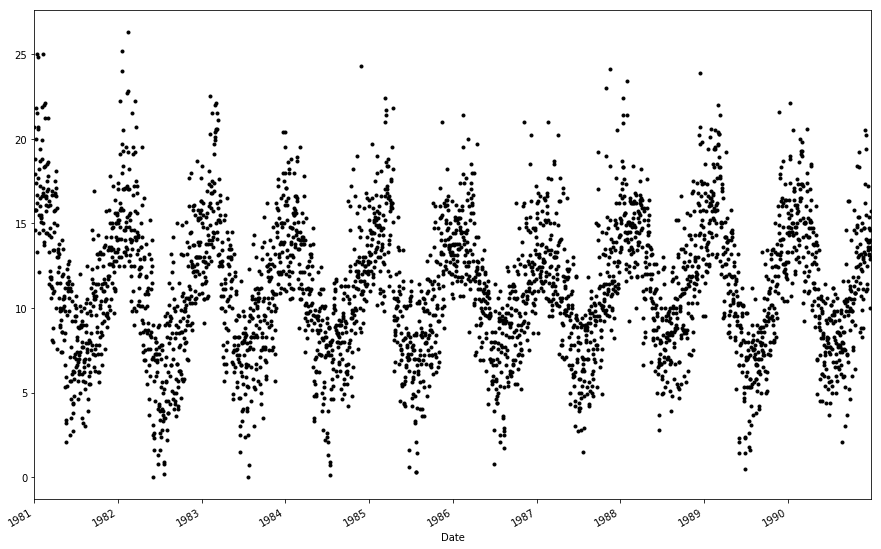

In [202]:
# Created a line plot
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
series.plot(style="k.", figsize=(15,10))
plt.show()

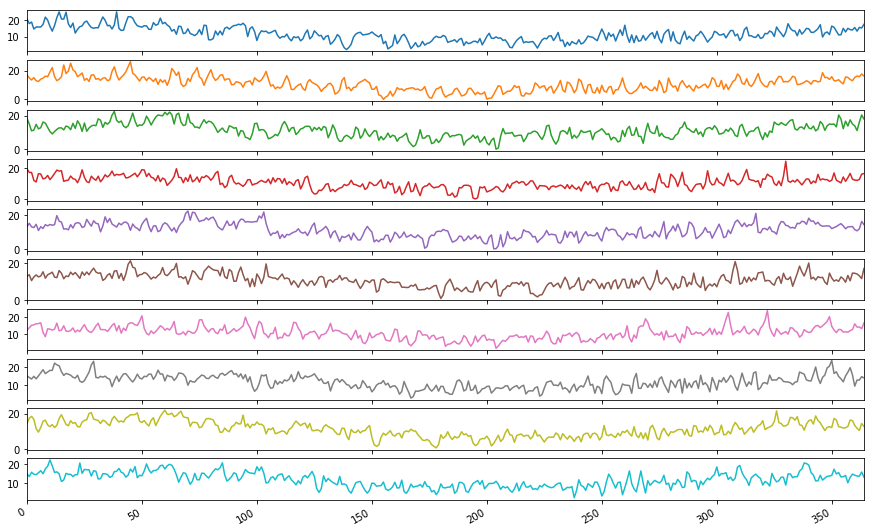

In [201]:
# Created Stacked line plots
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
groups = series.groupby(pd.TimeGrouper('A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.plot(subplots=True, legend=False, figsize=(15, 10))
plt.show()

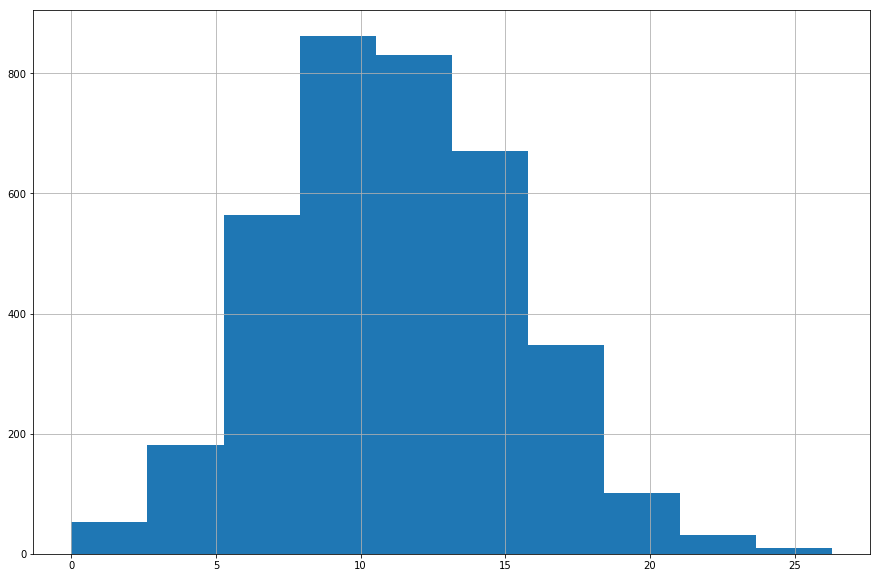

In [200]:
# Create a histogram plot
import pandas as pd

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
series.hist(figsize=(15,10))
plt.show()

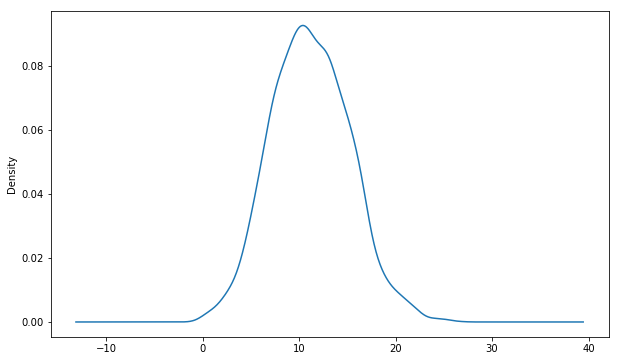

In [204]:
# Create a density plot
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
series.plot(kind='kde', figsize=(10,6))
plt.show()

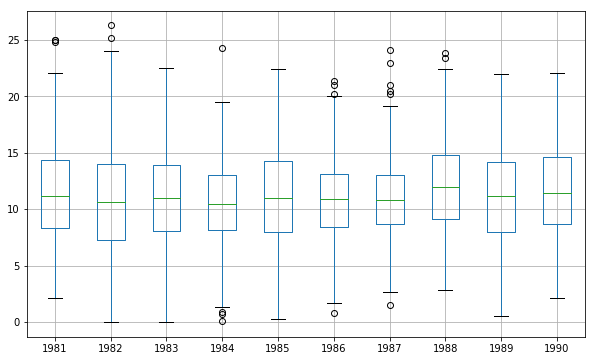

In [217]:
# Create a boxplot of yearly data
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
groups = series.groupby(pd.TimeGrouper('A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values

years.boxplot(figsize=(10,6))
plt.show()

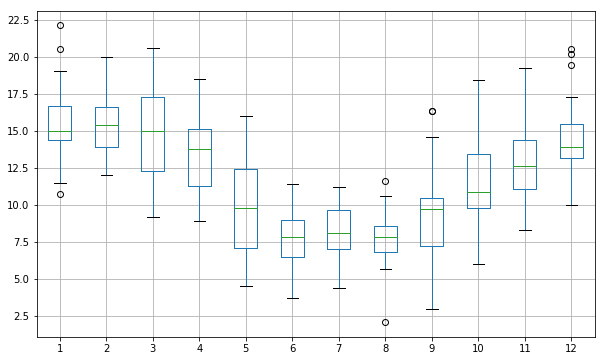

In [248]:
# Create a boxplot of monthly data
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
one_year = series['1990']
groups = one_year.groupby(pd.TimeGrouper('M'))

months = pd.concat([pd.DataFrame(m[1].values) for m in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot(figsize=(10,6))
plt.show()

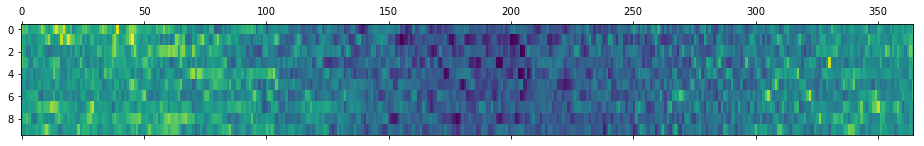

In [246]:
# Create a Heat Map of yearly data
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
groups = series.groupby(pd.TimeGrouper('A'))
years = pd.DataFrame()

for name, group in groups:
    years[name.year] = group.values
    
years = years.T
plt.matshow(years, interpolation=None, aspect="auto")
plt.show()

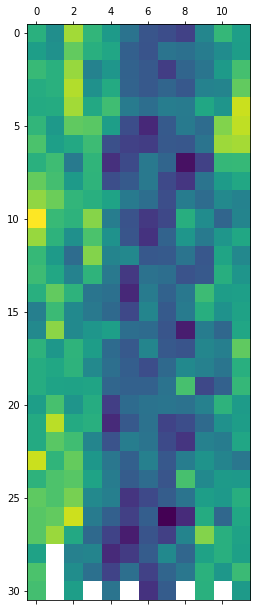

In [262]:
# Create a Heat Map of Monthly data
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
one_year = series['1990']
groups = one_year.groupby(pd.TimeGrouper('M'))

months = pd.concat([pd.DataFrame(m[1].values) for m in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)

plt.matshow(months, interpolation=None, aspect="auto")
plt.show()

# White patches are called Missing Data like February only have 28 days fewer than 31

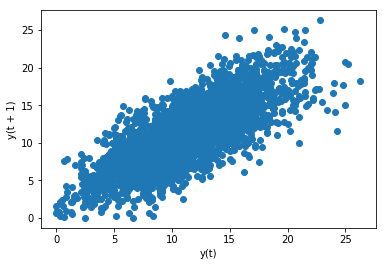

In [5]:
# Create a scatter plot
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
# This plots the Observation vs Lag1
lag_plot(series)
plt.show()

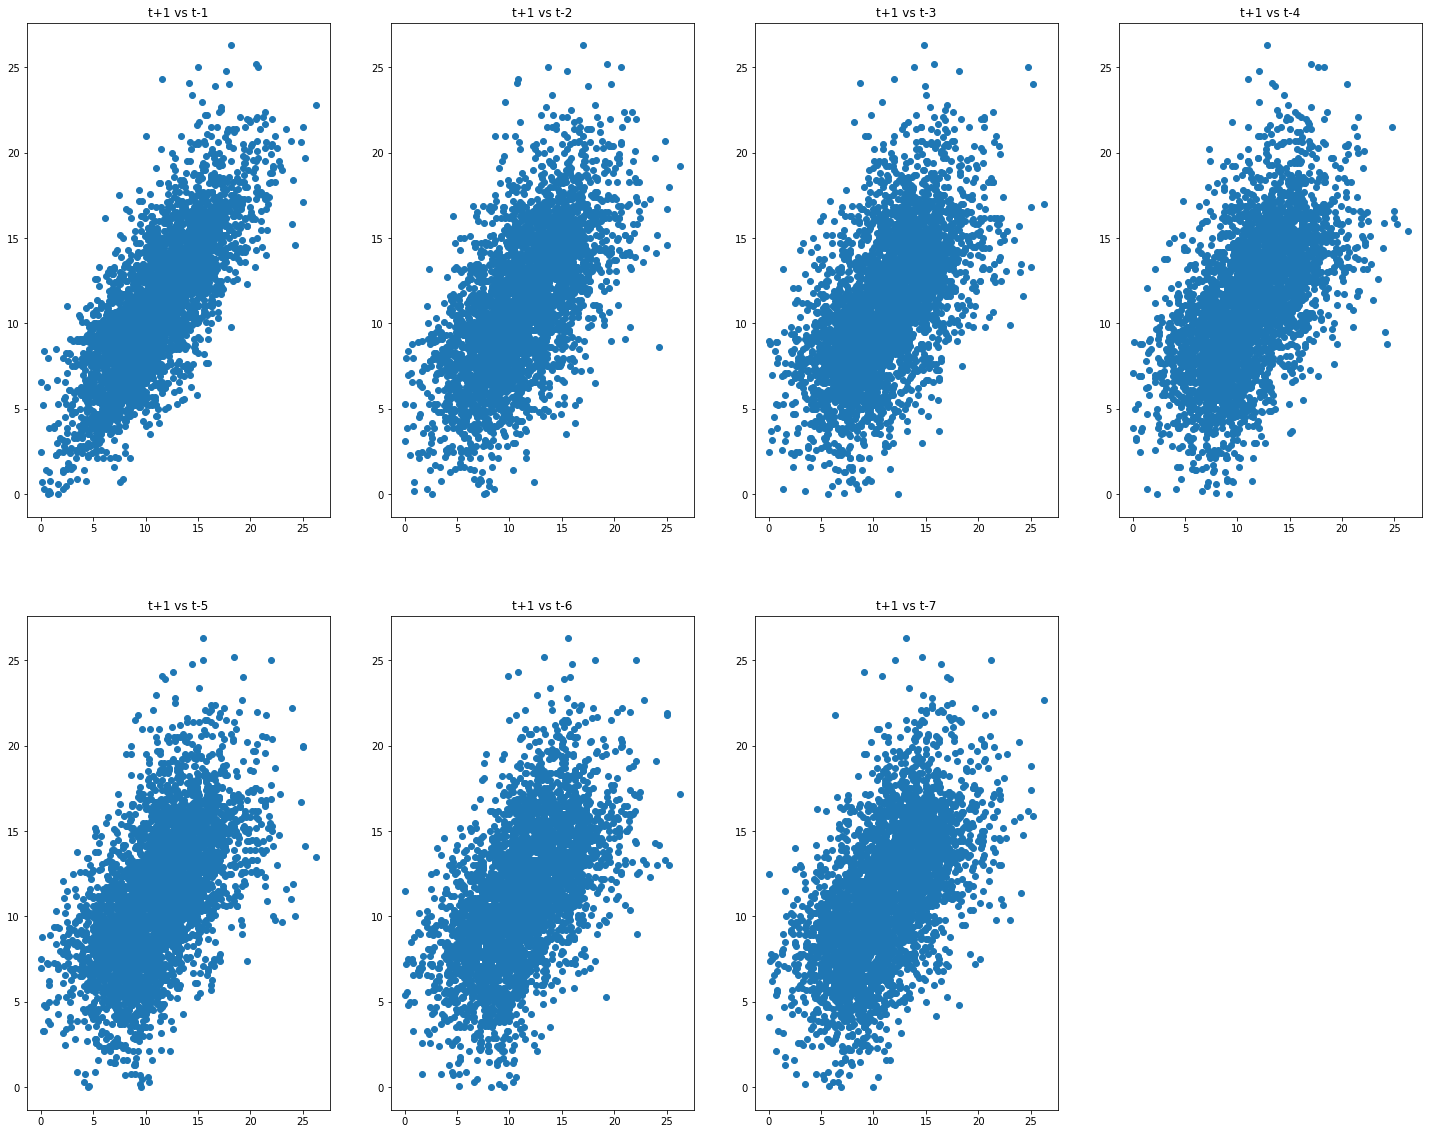

In [63]:
# Create Multiple scatter plot
import pandas as pd
import matplotlib.pyplot as plt

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)
values = pd.DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1, lags + 1):
    columns.append(values.shift(i))
    
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1, lags+1):
    columns.append('t-'+str(i))
dataframe.columns = columns

plt.figure(1, figsize = (25,20))
for i in range(1, (lags+1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-'+str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

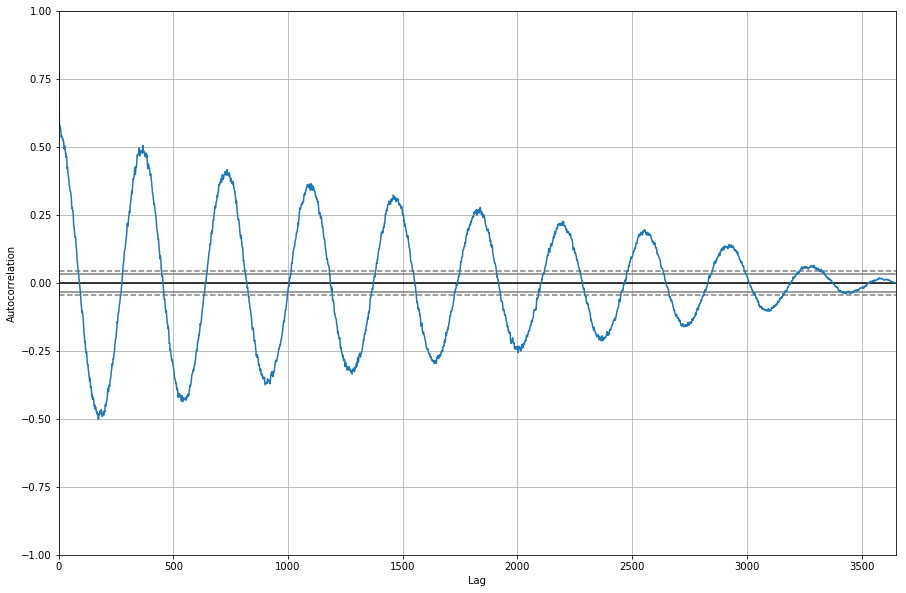

In [53]:
# Create an autocorrelation plot
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

series = pd.Series.from_csv("DataSets\daily-minimum-temperatures.csv", header=0)

plt.figure(figsize=(15,10))
autocorrelation_plot(series)
plt.show()